In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Banglore Housing Prices - Banglore Housing Prices.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df.dropna(inplace= True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Transform the size cols value to numerical values

In [6]:
df['size'] = df['size'].astype(str)
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


# Transform the total_sqft col

In [8]:
def convert_sqft(value):
    parts = value.split('-')
    if len(parts) == 2:  # Check if the value is a range
        return sum(map(float, parts)) / 2  # Calculate the average of the range
    else:  # If the value is a single number
        try:
            return float(value)  # Convert it to float
        except ValueError:
            return float('nan')  # Return NaN for invalid values


In [9]:
df['total_sqft']=[convert_sqft(value) for value in df['total_sqft']]

In [10]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [11]:
df['total_sqft'].isnull().sum()

46

In [12]:

df.dropna(inplace=True)
df['total_sqft'].isnull().sum()

0

# Calculate and add one more column as ‘Price_Per_Sqft’

In [13]:
df['Price_per_sqft']=df['price']/df['total_sqft']

In [14]:
df.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


# Remove the outliers from Price_Per_Sqft and BHK Size column


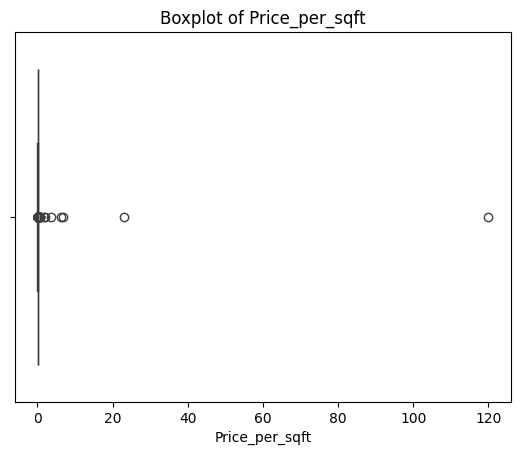

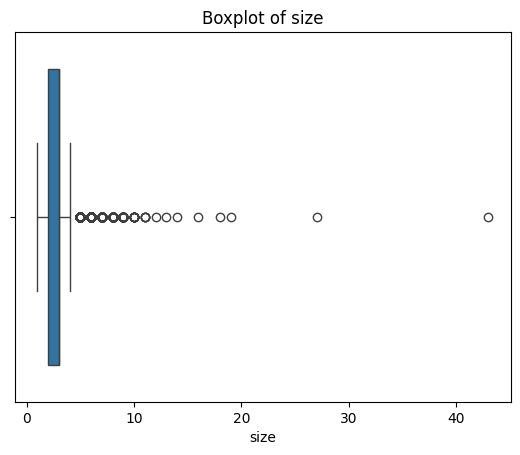

In [15]:
sns.boxplot(x=df['Price_per_sqft'])
plt.title('Boxplot of Price_per_sqft')
plt.xlabel('Price_per_sqft')
plt.show()

sns.boxplot(x=df['size'])
plt.title('Boxplot of size')
plt.xlabel('size')
plt.show()


In [16]:
import numpy as np

def cap_outliers_in_column(df_column):
    data = sorted(df_column)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR

    mean_value = (up_limit + low_limit) / 2
    return np.where(df_column < low_limit, low_limit,
                    np.where(df_column > up_limit, up_limit, df_column))


In [17]:
df['Price_per_sqft'] = cap_outliers_in_column(df['Price_per_sqft'])

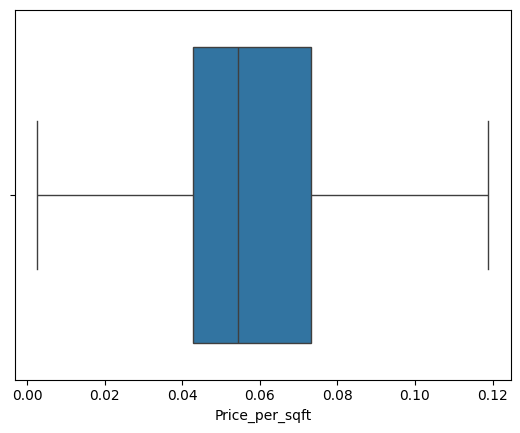

In [18]:
sns.boxplot(x=df['Price_per_sqft'])
plt.show()

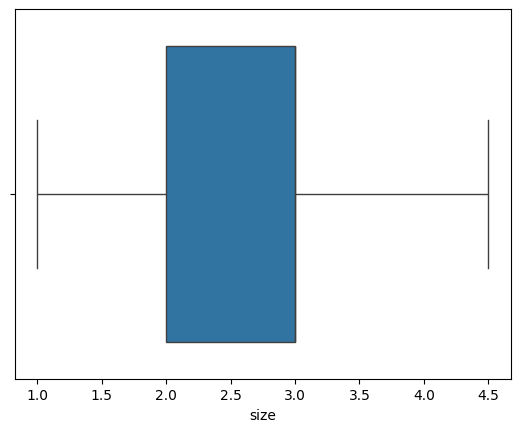

In [19]:
df['size'] = cap_outliers_in_column(df['size'])
sns.boxplot(x=df['size'])
plt.show()

In [20]:
df.isnull().sum()
df.dropna()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13315,Whitefield,4.5,3453.0,4.0,231.00,0.066898
13316,Richards Town,4.0,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,0.104073


In [45]:
X=df.drop(['price'],axis=1)
y = df['price']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42 )

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

# Evaluating the model using MSE


In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [52]:
print("Mean Squared Error:", mse)

Mean Squared Error: 5839.203490423609
